In [154]:
import pandas as pd
import numpy as np
import math
import random
import csv
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix  
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import time
import warnings
warnings.filterwarnings('ignore')

In [155]:
#csv_result-1year   australian.dat  Polish1yeartrain
url = "Polish6yeartrain.csv"
#url = "C:/Users/GEM TEST II/Documents/pyt/PSO-SVM-Algorithm-master/PSO-SVM-Algorithm-master/PSO SVM ALGORITHM/Polish1yeartrain.csv"
#colnames = ['x1', 'x2', 'x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14', 'y']
#colnames = ['x1', 'x2', 'x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15', 'x16', 'x17','x18','x19','x20','x21','x22','x23','x24','x25','x26','x27','x28','x29', 'x30', 'x31','x32','x33','x34','x35','x36','x37','x38','x39','x40','x41','x42','x43','x44','x45','x46','x47','x48','x49', 'x50','x51','x52','x53','x54','x55','x56','x57','x58','x59','x60','x61','x62','x63','x64','y']
colnames = ['x1', 'x2', 'x3','y']
data = pd.read_csv(url,header = None, names = colnames)

In [156]:
data.shape

(43401, 4)

In [157]:
data['y'].value_counts()

0    41310
1     2091
Name: y, dtype: int64

In [158]:
data['y'].value_counts()/np.float(len(data))

0    0.951821
1    0.048179
Name: y, dtype: float64

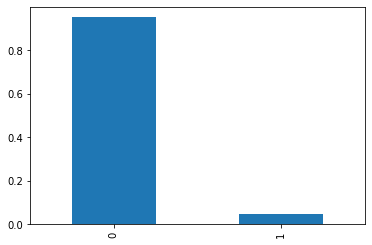

In [159]:
(data['y'].value_counts()/np.float(len(data))).plot.bar()

In [160]:
# declare feature vector and target variable

X = data.drop(['y'], axis=1)
y = data['y']

In [161]:
# import resample module 

from sklearn.utils import resample

In [162]:
# separate the minority and majority classes
df_majority = data[data['y']==0]
df_minority = data[data['y']==1]

In [163]:
# oversample minority class

df_minority_oversampled = resample(df_minority, replace=True, n_samples=43400, random_state=0)

In [164]:
# combine majority class with oversampled minority class

df_oversampled = pd.concat([df_majority, df_minority_oversampled])

In [165]:
# display new class value counts

df_oversampled['y'].value_counts()

1    43400
0    41310
Name: y, dtype: int64

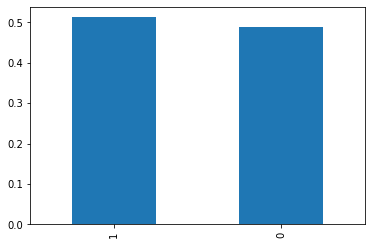

In [166]:
# view the distribution of percentages within the Class column


(df_oversampled['y'].value_counts()/np.float(len(df_oversampled))).plot.bar()

In [167]:
# declare feature vector and target variable
X1 = df_oversampled.drop(['y'], axis=1)
X1 =(X1-X1.mean())/X1.std()
y1 = df_oversampled['y']
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.20, random_state=42)

In [168]:
#################### I N P U T ####################
#berdasarkan buku: Based on a book
#khi = 0.729
#c1 = 2.05
#c2 = 2.05

#berdasarkan paper: Based on a paper
K = 0.3
c1 = 2
c2 = 5
c = c1+ c2
khi = 2*K/(abs(2-c-math.sqrt(c**2-4*c)))
n_iterations = int(input("Inform the number of iterations: "))
n_particles = int(input("Inform the number of particles: "))

Inform the number of iterations: 10
Inform the number of particles: 10


In [169]:
#mencari nilai 0-1 loss dari tiap partikel:find the 0-1 loss value of each particle
#partikle = (gamma,C) untuk rbf:particle = (gamma, C) for rbf
def fitness_function(position):
    svclassifier = SVC(kernel='rbf', gamma = position[0], C = position[1] )  
    svclassifier.fit(X_train, y_train)
    y_train_pred = svclassifier.predict(X_train)
    y_test_pred = svclassifier.predict(X_test) 
    #Performance Metrics
    print("Training Findings")
    print("Accuracy:",accuracy_score(y_train,y_train_pred))  
    print("Confusion Matrix:",confusion_matrix(y_train,y_train_pred))
    print("Testing Findings")
    print("Accuracy:",accuracy_score(y_test, y_test_pred))
    print("Confusion Matrix:",confusion_matrix(y_test,y_test_pred))
    #Time
    start = time.time()
    #model.fit(X, y)
    svclassifier.fit(X_train, y_train)
    svclassifier.fit(X_test, y_test)
    stop = time.time()
    print(f"Training time: {stop - start}s")
    print(f"Test time: {stop - start}s")
    return (confusion_matrix(y_train,y_train_pred)[0][1] + confusion_matrix(y_train,y_train_pred)[1][0])/np.sum(confusion_matrix(y_train,y_train_pred)), (confusion_matrix(y_test,y_test_pred)[0][1] + confusion_matrix(y_test,y_test_pred)[1][0])/np.sum(confusion_matrix(y_test,y_test_pred))

#plotting (x axis = gamma, y axis = C)
def plot(position):
    x = []
    y = []
    for i in range(0,len(particle_position_vector)):
        x.append(particle_position_vector[i][0])
        y.append(particle_position_vector[i][1])
    colors = (0,0,0)
    plt.scatter(x, y, c = colors, alpha = 0.1)
    plt.xlabel('gamma')
    plt.ylabel('C')
    plt.axis([0,9,0,10])
    plt.gca().set_aspect('equal', adjustable='box')
    return plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


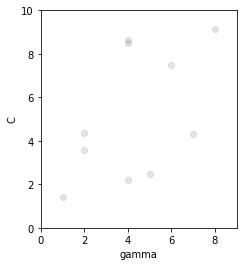

Training Findings
Accuracy: 0.6592787156179908
Confusion Matrix: [[19629 13403]
 [ 9687 25049]]
Testing Findings
Accuracy: 0.6569472317317908
Confusion Matrix: [[4925 3353]
 [2459 6205]]
Training time: 160.12723851203918s
Test time: 160.12723851203918s
error of particle- 1 is (training, test) (0.3407212843820092, 0.3430527682682092)  At (gamma, c):  [2.         4.36130639]
Training Findings
Accuracy: 0.660813363239287
Confusion Matrix: [[19732 13300]
 [ 9686 25050]]
Testing Findings
Accuracy: 0.65818675481053
Confusion Matrix: [[4954 3324]
 [2467 6197]]
Training time: 159.41107296943665s
Test time: 159.41107296943665s
error of particle- 2 is (training, test) (0.33918663676071303, 0.34181324518947)  At (gamma, c):  [4.         2.20868357]
Training Findings
Accuracy: 0.6629235037185692
Confusion Matrix: [[20669 12363]
 [10480 24256]]
Testing Findings
Accuracy: 0.6613740998701452
Confusion Matrix: [[5187 3091]
 [2646 6018]]
Training time: 161.4294877052307s
Test time: 161.4294877052307s
e

In [ ]:
particle_position_vector = np.array([np.array([random.randint(1,8), random.random()*10]) for _ in range(n_particles)])
pbest_position = particle_position_vector
pbest_fitness_value = np.array([float('inf') for _ in range(n_particles)])
gbest_fitness_value = np.array([float('inf'), float('inf')])
gbest_position = np.array([float('inf'), float('inf')])

velocity_vector = ([np.array([0, 0]) for _ in range(n_particles)])
iteration = 0
while iteration < n_iterations:
    plot(particle_position_vector)
    for i in range(n_particles):
        fitness_cadidate = fitness_function(particle_position_vector[i])
        print("error of particle-",i+1,"is (training, test)", fitness_cadidate, " At (gamma, c): ", particle_position_vector[i])
        
        if(pbest_fitness_value[i] > fitness_cadidate[1]):
            pbest_fitness_value[i] = fitness_cadidate[1]
            pbest_position[i] = particle_position_vector[i]

        if(gbest_fitness_value[1] > fitness_cadidate[1]):
            gbest_fitness_value = fitness_cadidate
            gbest_position = particle_position_vector[i]
        elif(gbest_fitness_value[1] == fitness_cadidate[1] and gbest_fitness_value[0] > fitness_cadidate[0]):
            gbest_fitness_value = fitness_cadidate
            gbest_position = particle_position_vector[i]
            
    for i in range(n_particles):
        #(gamma,C)
        max_velocity = np.array([8,10])
        min_velocity = np.array([-8,-10])
        max_position = np.array([8,10])
        min_position = np.array([1, 0.001])
        new_velocity = khi*(velocity_vector[i] + (c1*random.randint(0,3)) * (pbest_position[i] - particle_position_vector[i]) + (c2*random.random()) * (gbest_position-particle_position_vector[i]))
        new_velocity[0] = np.round(new_velocity[0])
        for j in range(0,len(new_velocity)):
            if(new_velocity[j] > max_velocity[j]):
                new_velocity[j] = max_velocity[j]
            elif(new_velocity[j] < min_velocity[j]):
                new_velocity[j] = min_velocity[j]
            
        new_position = new_velocity + particle_position_vector[i]
        particle_position_vector[i] = new_position
        for j in range(0,2):
            if(particle_position_vector[i][j] > max_position[j]):
                particle_position_vector[i][j] = max_position[j]
            elif(particle_position_vector[i][j] < min_position[j]):
                particle_position_vector[i][j] = min_position[j]
    
    iteration = iteration + 1
    
print("The best position is ", gbest_position, "in iteration number", iteration, "with error rate (train, test):", fitness_function(gbest_position))
#print("The Confusion Matrix:", fitness_function(confusion_matrix(y_train,y_train_pred)[0][1] + confusion_matrix(y_train,y_train_pred)[1][0])/np.sum(confusion_matrix(y_train,y_train_pred)), (confusion_matrix(y_test,y_test_pred)[0][1] + confusion_matrix(y_test,y_test_pred)[1][0])/np.sum(confusion_matrix(y_test,y_test_pred)))